In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Data/data.csv', index_col=0)
data.head()

,f1,f2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


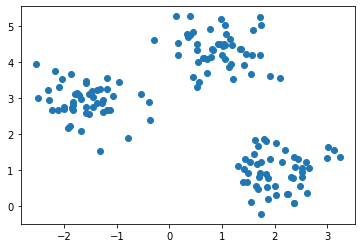

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data.f1, data.f2)

In [5]:
from sklearn.cluster import KMeans
import numpy as np

In [7]:
from scipy.spatial.distance import cdist

In [8]:
#building
dist=[]
K=range(1,8)
for k in K:
    model=KMeans(n_clusters=k).fit(data)
    dist.append(sum(np.min(cdist(data, model.cluster_centers_,'euclidean'), axis=1)))

In [9]:
dist

[316.2461905429878,
 187.29472933155833,
 92.50346209391442,
 84.90795044648314,
 79.66168839872128,
 74.04065812696916,
 67.88412118962091]

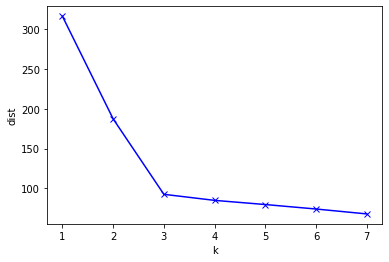

In [10]:
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('dist')
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [12]:
center=kmeans.cluster_centers_
labels=kmeans.labels_

In [13]:
print(center)

[[ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]]


In [14]:
print(labels)

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


In [15]:
data['Group']=pd.Series(labels)
data.head()

,f1,f2,Group
0,2.605097,1.225296,1
1,0.532377,3.313389,0
2,0.802314,4.381962,0
3,0.528537,4.497239,0
4,2.618585,0.357698,1


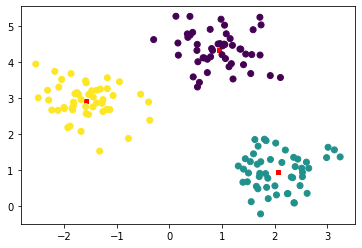

In [16]:
plt.scatter(center[:,0], center[:,1], marker='s', s=15, c='red')
plt.scatter(data.f1, data.f2, c=data.Group)
plt.show()